# Analysis of EV car prices

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [402]:
df_raw = pd.read_csv('./Cheapestelectriccars-EVDatabase.csv')
df=df_raw.copy()

In [403]:
df.shape

(180, 11)

### Data Preparation and Data Cleaning

In [404]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [405]:
df = df.fillna('0')

In [406]:
df.isna().sum()

Name               0
Subtitle           0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
PriceinUK          0
dtype: int64

In [407]:
df.sample(5)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
64,Renault Twingo Electric,Battery Electric Vehicle | 21.3 kWh,12.6 sec,135 km/h,130 km,164 Wh/km,-,Rear Wheel Drive,4,"€24,790",0
113,Peugeot e-Traveller Standard 50 kWh,Battery Electric Vehicle | 45 kWh,13.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€55,900","£49,065"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
161,Mercedes EQA 300 4MATIC,Battery Electric Vehicle | 66.5 kWh,7.7 sec,160 km/h,350 km,190 Wh/km,420 km/h,All Wheel Drive,5,"€53,538",0
116,Peugeot e-Traveller Long 75 kWh,Battery Electric Vehicle | 68 kWh,13.3 sec,130 km/h,270 km,252 Wh/km,290 km/h,Front Wheel Drive,7,"€58,230",0


In [408]:
df['Brand'] = df.Name.str.split(' ', expand=True)[0]

In [409]:
df.sample(5)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand
163,Toyota PROACE Verso M 50 kWh,Battery Electric Vehicle | 45 kWh,12.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€58,530",0,Toyota
8,Nissan Leaf e+,Battery Electric Vehicle | 56 kWh,7.3 sec,157 km/h,325 km,172 Wh/km,390 km/h,Front Wheel Drive,5,"€38,350","£30,445",Nissan
103,Citroen e-SpaceTourer M 50 kWh,Battery Electric Vehicle | 45 kWh,12.1 sec,130 km/h,185 km,243 Wh/km,250 km/h,Front Wheel Drive,7,"€51,440","£31,995",Citroen
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",0,Opel
134,Porsche Taycan 4S Cross Turismo,Battery Electric Vehicle | 83.7 kWh,4.1 sec,240 km/h,405 km,207 Wh/km,850 km/h,All Wheel Drive,4,"€111,842","£87,820",Porsche


In [410]:
# Now, we will prepare the data for Acceleration
acc=[]
for val in df.Acceleration:
    acc+= [float(val.replace(' sec',''))]
df.Acceleration = acc

In [411]:
# Now, we will prepare the data for TopSpeed
top_speed=[]
for val in df.TopSpeed:
    top_speed+= [int(val.replace(' km/h',''))]
df.TopSpeed = top_speed

In [412]:
# Now, we will prepare the data for Range
range=[]
for val in df.Range:
    range+= [int(val.replace(' km',''))]
df.Range = range

In [413]:
# Now, we will prepare the data for Efficiency
Efficiency=[]
for val in df['Efficiency']:
    Efficiency+=[int(val.replace(' Wh/km','').replace('-','0'))]
df['Efficiency']=Efficiency

In [414]:
# Now, we will prepare the data for Fast Charging Speed
FastChargeSpeed=[]
for val in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(val.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

In [415]:
#cleaning the data 
#removing currency sign
PriceinGermany=[]
for val in df['PriceinGermany']:
    PriceinGermany+=[int(val.replace('€','').replace(',',''))]
df['PriceinGermany']=PriceinGermany

In [416]:
#cleaning the data
#removing currency sign
PriceinUK=[]
for val in df['PriceinUK']:
    PriceinUK+=[int(val.replace('£','').replace(',',''))]
df['PriceinUK']=PriceinUK

In [417]:
df = df.rename(columns = {'Subtitle':'KWH'})

In [418]:
kwh=[]
for item in df['KWH']:
    kwh+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df['KWH']=kwh


In [419]:
df.sample(10)

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand
73,Skoda Enyaq iV 80X,77.0,6.9,160,405,190,500,All Wheel Drive,5,47000,42000,Skoda
131,Volvo C40 Recharge,75.0,4.7,180,340,221,440,All Wheel Drive,5,62050,57400,Volvo
15,Kia e-Soul 64 kWh,64.0,7.9,167,370,173,350,Front Wheel Drive,5,0,37545,Kia
82,Nissan Ariya 87kWh,87.0,7.6,160,445,196,530,Front Wheel Drive,5,50000,45000,Nissan
137,Kia EV6 GT,77.4,3.5,260,395,196,920,All Wheel Drive,5,65990,58295,Kia
135,Porsche Taycan Turbo Cross Turismo,83.7,3.3,250,385,217,800,All Wheel Drive,4,154444,116950,Porsche
164,Toyota PROACE Verso L 50 kWh,45.0,12.1,130,180,250,240,Front Wheel Drive,7,59385,0,Toyota
76,Citroen e-C4,45.0,9.7,150,250,180,330,Front Wheel Drive,5,34640,30895,Citroen
108,Opel Zafira-e Life M 50 kWh,45.0,12.1,130,185,243,250,Front Wheel Drive,7,53800,0,Opel
91,Lucid Air Touring,85.0,3.4,250,530,160,1390,All Wheel Drive,5,95000,90000,Lucid


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Brand            180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


### Data Understanding and Visualization

In [421]:
df.corr(numeric_only=True)

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


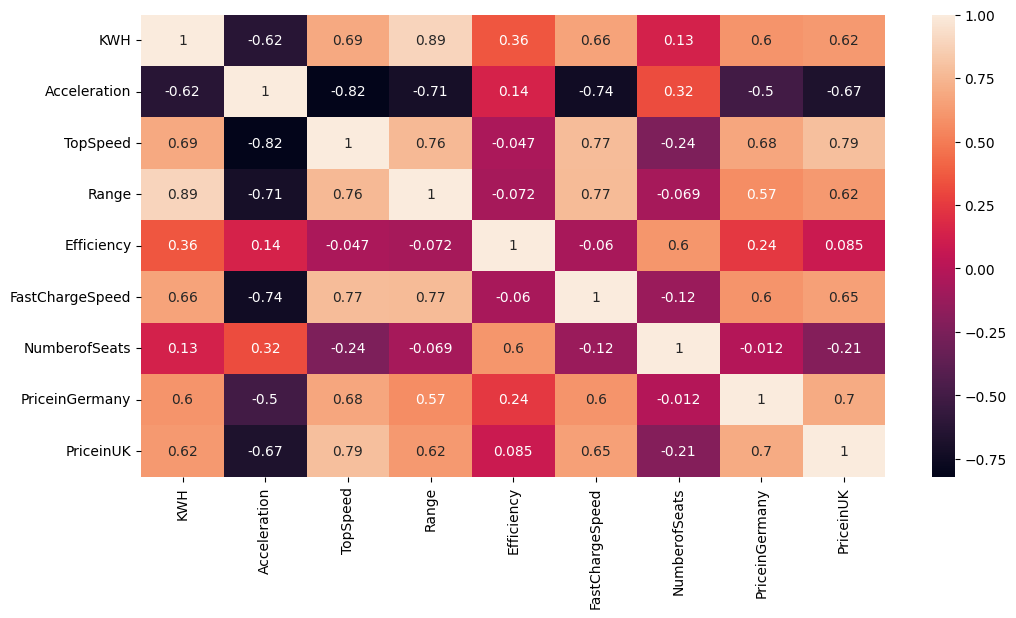

In [422]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

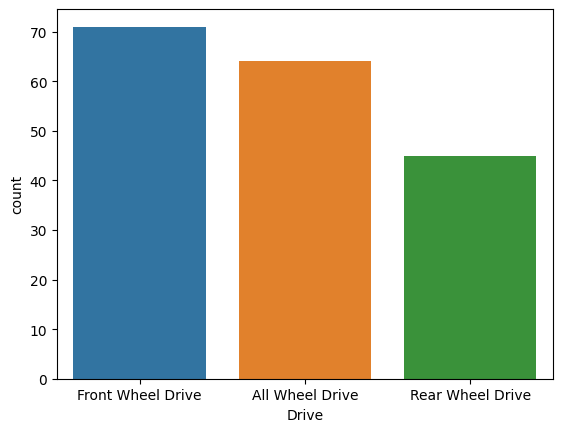

In [423]:
sns.countplot(x = 'Drive', data = df)
plt.show()

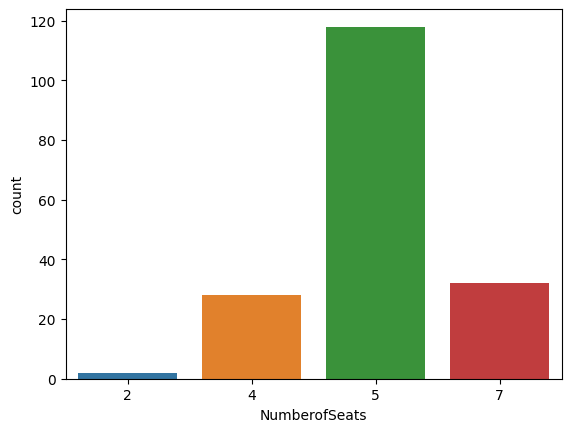

In [424]:
sns.countplot(x = 'NumberofSeats', data = df)
plt.show()

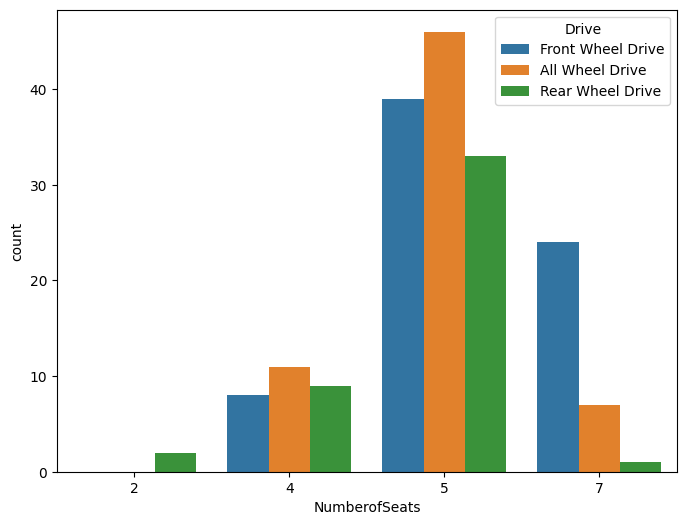

In [425]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df)
plt.show()

In [426]:
group_df = df.groupby('Brand')['Name'].count().reset_index()
group_df.columns = ['Brand', 'Name']
group_df.sort_values(by='Name', ascending=False, inplace=True)
# group_df

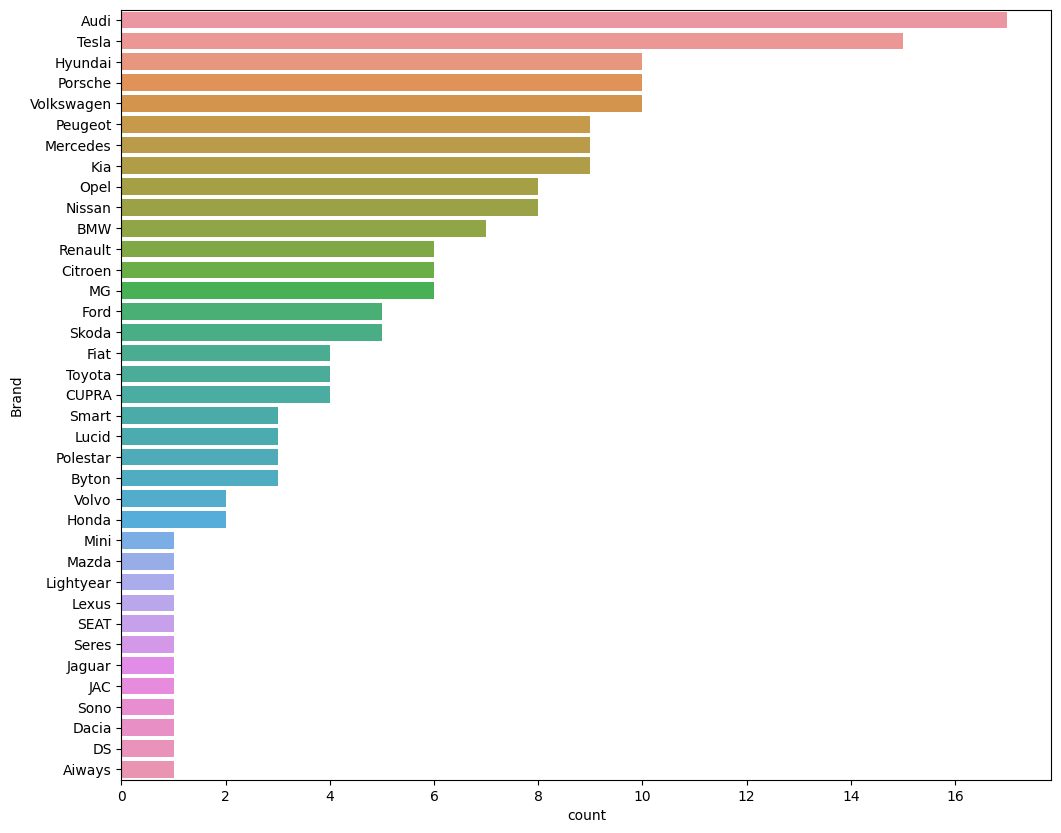

In [427]:
plt.figure(figsize=(12,10))
sns.countplot(y='Brand', data=df, order=group_df['Brand'])
plt.show()

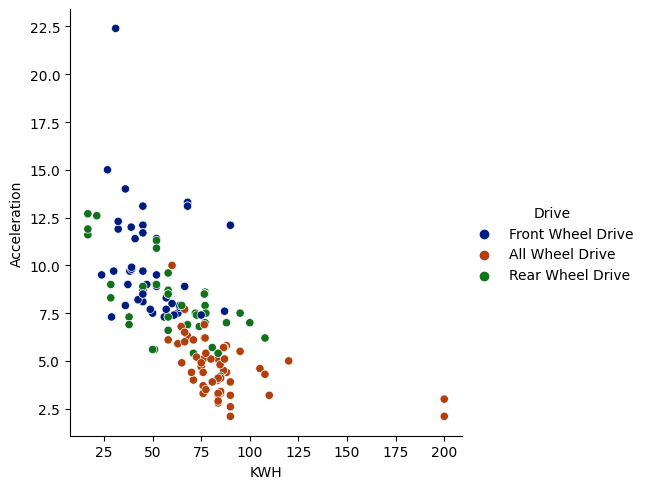

In [428]:
sns.relplot(x="KWH", y="Acceleration", height=5, hue="Drive", data=df, palette='dark')
plt.show()

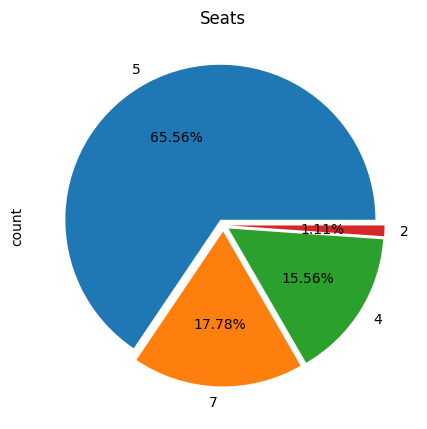

In [429]:
#Number of Seats
explode = (0.04, 0.04, 0.04, 0.04) 
df['NumberofSeats'].value_counts().plot.pie(figsize=(5,8),autopct='%.2f%%', explode=explode)
plt.title('Seats')
plt.show()

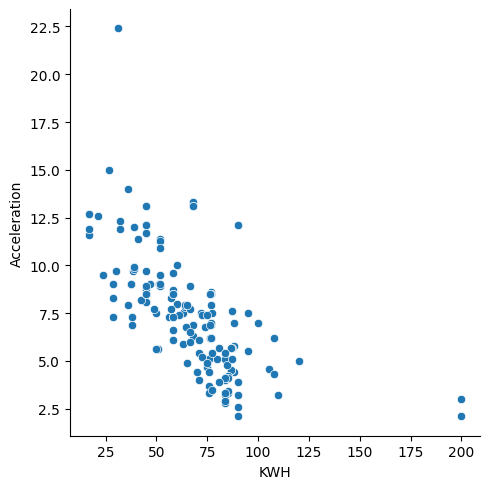

In [430]:
sns.relplot(x="KWH", y="Acceleration", height=5, sizes=(15, 100), data=df)
plt.show()

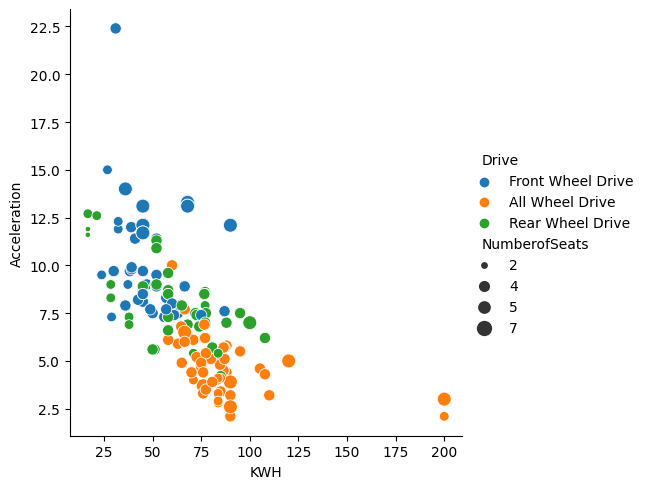

In [431]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", hue="Drive", height=5, sizes=(15, 100), data=df)
plt.show()

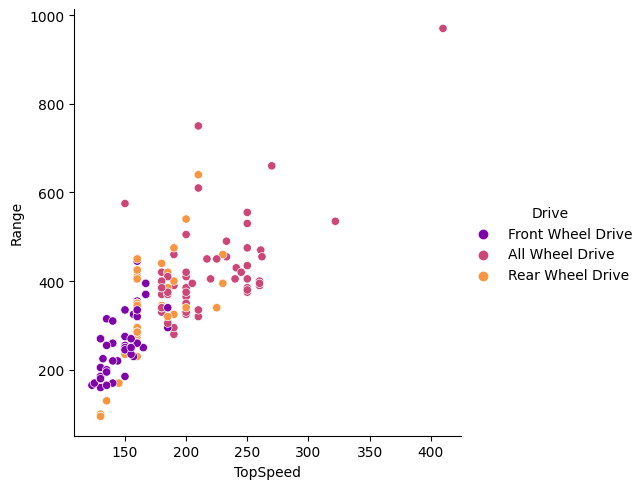

In [432]:
sns.relplot(x="TopSpeed", y="Range", height=5, hue="Drive", data=df, palette='plasma')
plt.show()

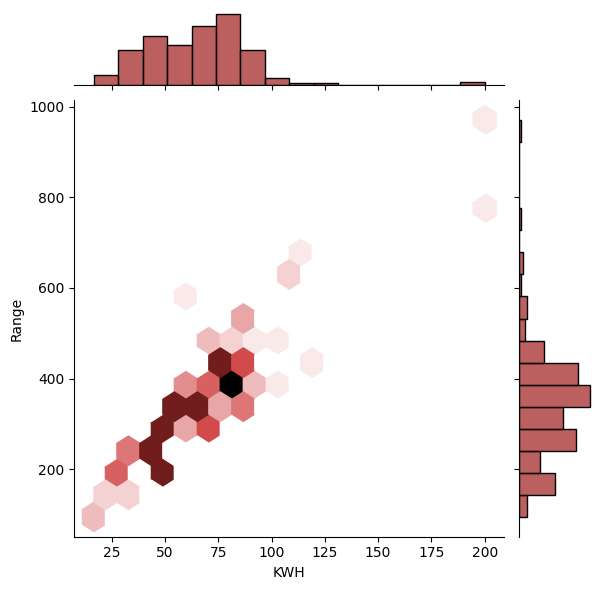

In [433]:
sns.jointplot(x=df["KWH"], y=df["Range"], kind="hex", color="brown")
plt.show()

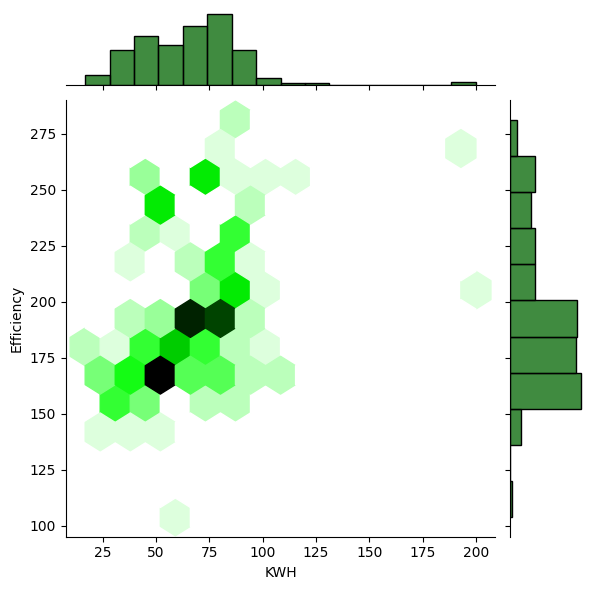

In [434]:
sns.jointplot(x=df["KWH"], y=df["Efficiency"], kind="hex", color="darkgreen")
plt.show()

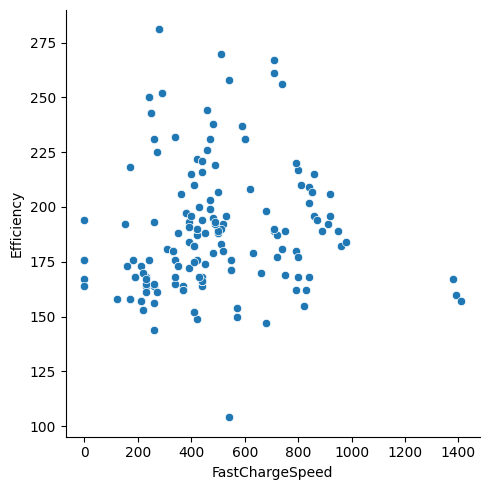

In [435]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=5, data=df, palette='red')
plt.show()

In [436]:
df.columns!='object'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

<Figure size 800x600 with 0 Axes>

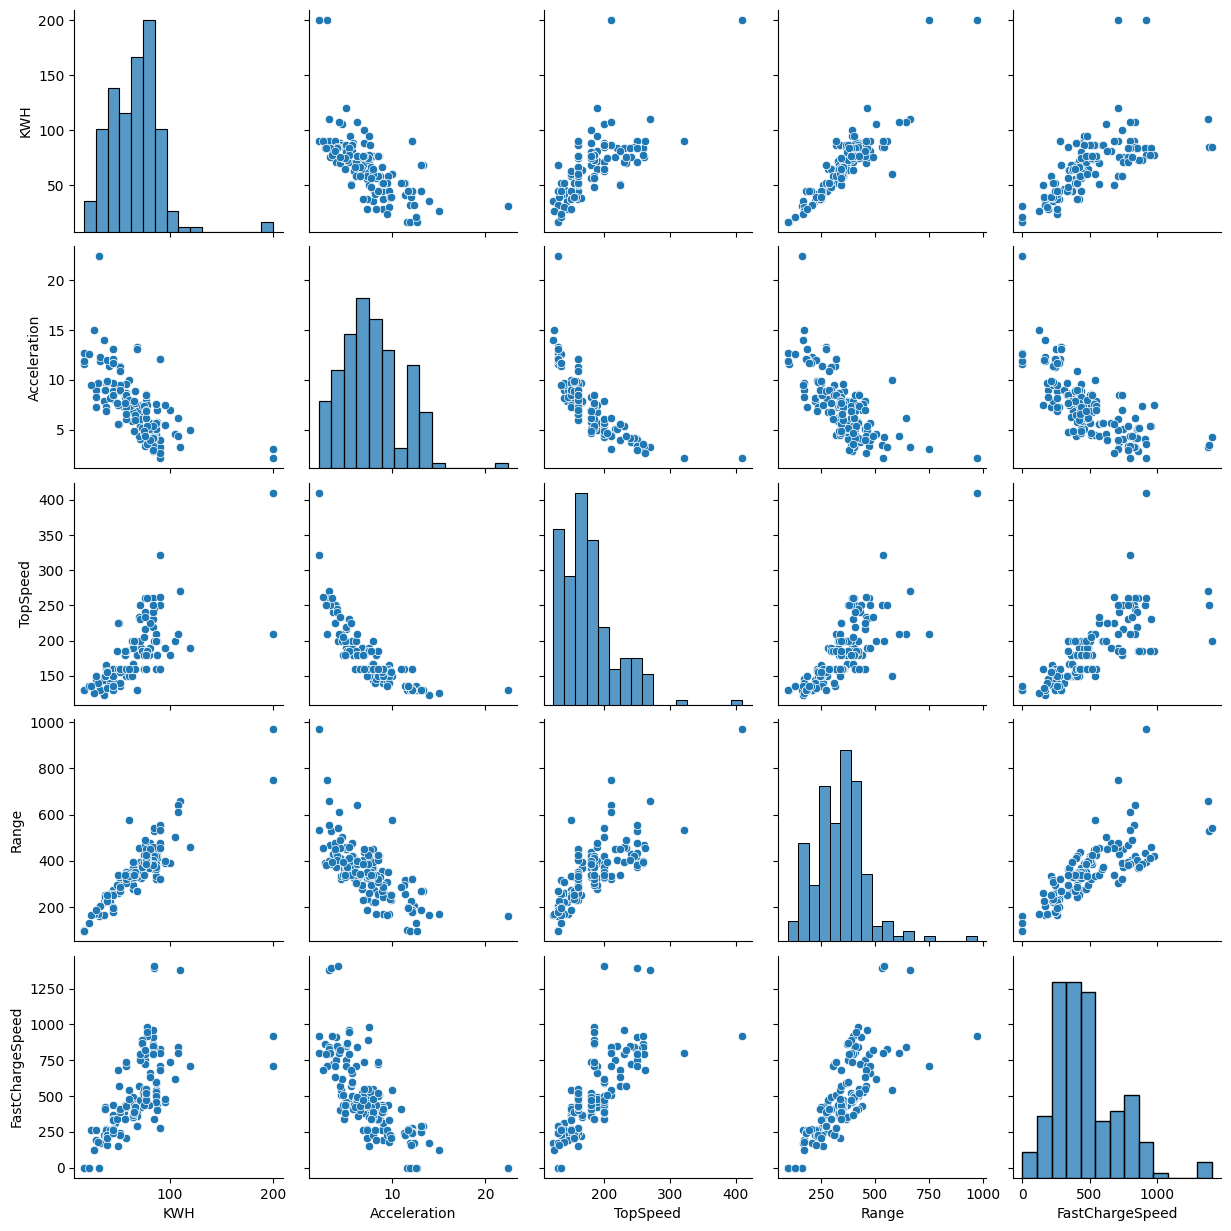

In [437]:
plt.figure(figsize=(8,6))
sns.pairplot(df[["KWH", "Acceleration", "TopSpeed", "Range", "FastChargeSpeed"]])
plt.show()

In [438]:
# Considering 1 Euro = 0.85 Pound
# Let us see the number of empty values in Pounds.

c=0
for val in df.PriceinUK:
    if val==0:
        c+=1
print('"PriceinUK" Empty Values:',c)

"PriceinUK" Empty Values: 44


In [439]:
pd.options.mode.chained_assignment = None

In [440]:
mask = df["PriceinUK"] == 0
df.loc[mask, "PriceinUK"] = df.loc[mask, "PriceinGermany"] * 0.85
df.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541.5,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680.0,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995.0,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900.0,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830.0,Porsche


In [441]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Drive = le.fit_transform(df.Drive)

In [442]:
df.sample(5)

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Brand
80,Audi Q4 Sportback e-tron 35,51.5,9.0,160,295,175,410,2,5,43900,42250.0,Audi
58,Tesla Cybertruck Dual Motor,120.0,5.0,190,460,261,710,0,7,55000,48000.0,Tesla
57,Tesla Cybertruck Single Motor,100.0,7.0,180,390,256,740,2,7,45000,39000.0,Tesla
85,Nissan Ariya e-4ORCE 87kWh Performance,87.0,5.1,200,385,226,460,0,5,65000,57500.0,Nissan
54,Ford Mustang Mach-E ER AWD,88.0,5.8,180,420,210,410,0,5,62900,57030.0,Ford


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int64  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    float64
 11  Brand            180 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 17.0+ KB


### Training and Testing model

In [444]:
feature = df.drop(['Name', 'PriceinGermany','PriceinUK','Brand'], axis=1)
target = df['PriceinUK']

In [445]:
print(f"Feature shape: {feature.shape}")
print(f"Feature columns: {feature.columns.to_list()}")

Feature shape: (180, 8)
Feature columns: ['KWH', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats']


In [446]:
print(f"Target shape: {target.shape}")
print(target.head(1))

Target shape: (180,)
0    36541.5
Name: PriceinUK, dtype: float64


In [447]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=5)

### Linear Regression

In [448]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report

model_lg = LinearRegression()
model_lg.fit(X_train, y_train)

LinearRegression()

In [449]:
y_pred = model_lg.predict(X_test)
y_pred

array([ 7.44224705e+04,  7.12424165e+04,  1.23864527e+04,  6.80383481e+04,
        3.27207787e+04,  1.56870189e+04,  7.32210754e+04,  1.69016846e+04,
        4.67340035e+04,  3.70441292e+04,  2.53304179e+04, -7.74094819e+01,
        1.08117741e+04,  6.99550074e+04,  1.70066424e+04,  6.03007692e+04,
        9.18391610e+04,  5.79544335e+04,  2.13673200e+04,  4.52785449e+04,
        4.74618459e+04,  8.27859363e+04,  2.18880692e+04,  4.17977043e+04,
        4.42224513e+04,  4.74618459e+04,  1.54745056e+04,  4.58076002e+04,
        9.16763194e+04,  6.85201128e+04,  8.84833765e+04,  8.55011667e+04,
        4.74618459e+04,  6.56205659e+04,  3.13773957e+04,  4.99065914e+04,
        5.01618591e+04,  5.57101337e+04,  6.58495759e+04,  6.20292288e+04,
        4.03594417e+04,  3.97855787e+04,  4.19729104e+04,  3.54156649e+04,
        8.26076991e+04,  2.30819481e+04,  5.36450106e+04,  4.70119377e+04,
        5.83896249e+04,  8.98338991e+04,  1.99415245e+04,  4.19708869e+04,
        5.76559995e+04,  

In [450]:
r_squared = r2_score(y_test,y_pred)         #R-squared value suggests the model's accuracy
print("R-squared:",r_squared*100)

mse = mean_squared_error(y_test, y_pred)    # Evaluating the model's performance using Mean Squared Error (MSE)
print("Mean Squared Error:", mse)

coef = model_lg.coef_                       # the change in the target variable
print("Coefficient:", coef[0])

intercept = model_lg.intercept_             # the expected value of the target variable
print("Intercept:", intercept)

R-squared: 71.21124686357301
Mean Squared Error: 142135404.00177148
Coefficient: -1680.1560400757508
Intercept: -201699.91790726763


### Random Forest Regressor

In [451]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators=300, random_state=0)

# fit the model
model_rfr.fit(X_train, y_train)

# predict the model
y_pred = model_rfr.predict(X_test)

In [452]:
# Mean Absolute Error(MAE)
print("MAE: ",mean_absolute_error(y_test,y_pred))

# Mean Squared Error(MSE)
print("MSE: ",mean_squared_error(y_test,y_pred))

# Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

# R-Squared (R2)
r2 = r2_score(y_test,y_pred)
print("R2: ",r2*100)

MAE:  6462.139180357364
MSE:  95187996.3770904
RMSE:  9756.433589026801
R2:  80.72018897405036


### Predictions

In [453]:
correlation_matrix = df.corr(numeric_only=True)

# Set the threshold for correlation (e.g., 0.7)
threshold = 0.7

# Create a boolean mask to identify columns with correlations greater than the threshold
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)

# Extract the column names that meet the condition
correlated_columns = set()
for col in mask.columns:
    correlated_columns.update(mask.index[mask[col]])


# Convert the set of correlated columns to a list
correlated_columns = list(correlated_columns)

print("Columns with correlations greater than 0.7:", correlated_columns)


Columns with correlations greater than 0.7: ['Range', 'Acceleration', 'PriceinGermany', 'KWH', 'TopSpeed', 'PriceinUK', 'FastChargeSpeed']


In [454]:
# Feature columns:          ['KWH', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats']
# Columns with corr > 0.7:  ['Range', 'Acceleration', 'PriceinGermany', 'KWH', 'TopSpeed', 'PriceinUK', 'FastChargeSpeed']

In [455]:
KWH = 55.4
Acceleration = 5.3
TopSpeed = 250
Range = 300
Efficiency = 220
FastChargeSpeed = 350
Drive = 2
NumberofSeats = 4

In [456]:
predict1 = np.array([[KWH, Acceleration, TopSpeed, Range, Efficiency, FastChargeSpeed, Drive, NumberofSeats]])
prediction = model_lg.predict(predict1)
prediction=float(prediction)
print('Linear Regression Model Predicted UKPrice: €', round(prediction, 2))

Linear Regression Model Predicted UKPrice: € 103602.55


In [457]:
KWH = 150
Acceleration = 2.6
TopSpeed = 500
Range = 650
Efficiency = 348
FastChargeSpeed = 754
Drive = 0
NumberofSeats = 2

In [458]:
predict2 = np.array([[KWH, Acceleration, TopSpeed, Range, Efficiency, FastChargeSpeed, Drive, NumberofSeats]])
prediction = model_rfr.predict(predict2)
prediction=float(prediction)
print('RandomFOrestRegression Model Predicted UKPrice: €', round(prediction, 2))

RandomFOrestRegression Model Predicted UKPrice: € 138067.57
